In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import squarify 
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
data = pd.read_csv('../data/서울특별시_일반음식점.csv', 
                  encoding = 'cp949',
                  low_memory = False)

### - 영업상태가 폐업인 업장의 자치구별 분포도(업종 일반음식점인 업장)
    - 폐업이 얼마나 되는지 음식점의 폐업율을 확인

In [8]:
data_fin = data[data.영업상태명.isin(['폐업'])]

In [14]:
set(data.영업상태명[data.영업상태명.str.contains('폐업', na = False)])

{'폐업'}

In [11]:
data_fin.head(3set(data.소재지전체주소.values))

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
124208,124209,일반음식점,07_24_04_P,3220000,3220000-101-2020-00852,20200803,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,13.81,NaN,NaN,NaN,NaN
124209,124210,일반음식점,07_24_04_P,3220000,3220000-101-2020-00854,20200803,NaN,3,폐업,2,...,0.0,NaN,0.0,0,Y,141.00,NaN,NaN,NaN,NaN
124210,124211,일반음식점,07_24_04_P,3040000,3040000-101-2020-00274,20200803,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,87.30,NaN,NaN,NaN,NaN


In [15]:
res = data_fin.소재지전체주소.str.split(' ')
res

124208                    [서울특별시, 강남구, 삼성동, 157-18]
124209                       [서울특별시, 강남구, 논현동, 8-9]
124210                    [서울특별시, 광진구, 중곡동, 118-34]
124211         [서울특별시, 광진구, 구의동, 591-22, 강변리버빌101호]
124212             [서울특별시, 강남구, 압구정동, 429, 현대백화점본점]
                            ...                    
472910                    [서울특별시, 강남구, 역삼동, 799-18]
472911               [서울특별시, 강남구, 역삼동, 668-9, 해석빌딩]
472912                [서울특별시, 강남구, 논현동, 108, 논현웰스톤]
472913    [서울특별시, 강서구, 마곡동, 798-6, 류마타워Ⅱ, 3층, 310호]
472914                    [서울특별시, 마포구, 망원동, 435-34]
Name: 소재지전체주소, Length: 348707, dtype: object

In [64]:
fin_t = []
for idx in res.index :
    try:
        fin_t.append(res.loc[idx][1])
    except:
        pass
# TypeError: 'float' object is not subscriptable -> 결측치가 있어서, null data가 있기 때문에 발생하는 오류

In [65]:
fin_s = pd.Series(fin_t)
fin_s.value_counts()

강남구     31816
송파구     19763
서초구     18940
영등포구    17467
강동구     17006
마포구     16997
동대문구    15648
관악구     15599
강서구     14219
구로구     13624
중구      13480
양천구     12947
서대문구    12535
성북구     12288
중랑구     12236
강북구     11914
은평구     11855
광진구     11792
종로구     11587
노원구     10731
동작구      9868
금천구      9311
용산구      9186
성동구      9099
도봉구      8640
성남시         2
고양시         2
제주시         1
수영구         1
Name: count, dtype: int64

In [66]:
fin_s[fin_s == '성남시'].index
fin_s[fin_s == '고양시'].index
fin_s[fin_s == '제주시'].index
fin_s[fin_s == '수영구'].index

Index([198856], dtype='int64')

In [70]:
exclude_cities = ['성남시', '고양시', '제주시', '수영구']
fin = fin_s[~fin_s.isin(exclude_cities)].value_counts() # isin 일치하는 요소의 확인 / ~ 속하지 않는 값을 선택하기 위함이다.
print(fin)

강남구     31816
송파구     19763
서초구     18940
영등포구    17467
강동구     17006
마포구     16997
동대문구    15648
관악구     15599
강서구     14219
구로구     13624
중구      13480
양천구     12947
서대문구    12535
성북구     12288
중랑구     12236
강북구     11914
은평구     11855
광진구     11792
종로구     11587
노원구     10731
동작구      9868
금천구      9311
용산구      9186
성동구      9099
도봉구      8640
Name: count, dtype: int64


<Axes: >

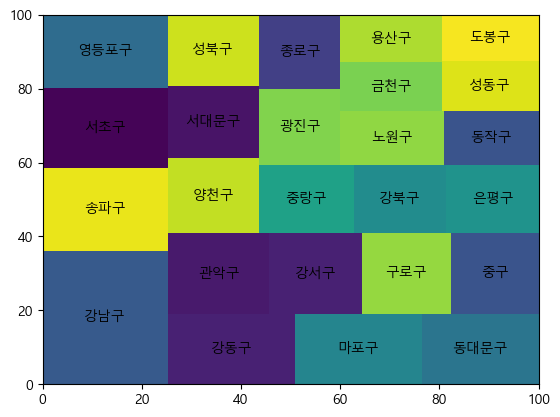

In [71]:
squarify.plot(fin, label = fin.index)